In [ ]:
import collections
import re


from d2l.tensorflow import config

config.setup('CPU')

### The Time Machine (loaded)

In [1]:
with open('../data/timemachine.txt', 'r') as f:
    lines = f.readlines()
    raw_dataset = [re.sub('[^A-Za-z]+', ' ', st).lower().split() for st in lines]

# Let's read the first 10 lines of the text    
for st in raw_dataset[8:10]:
    print('# tokens:', len(st), st)        

# tokens: 4 ['title', 'the', 'time', 'machine']
# tokens: 0 []


### Word Counts

In [2]:
counter = collections.Counter([tk for st in raw_dataset for tk in st])
print("frequency of 'traveller':", counter['traveller'])
# Print the 10 most frequent words with word frequency count
print(counter.most_common(10))

frequency of 'traveller': 61
[('the', 2439), ('and', 1313), ('of', 1271), ('i', 1267), ('a', 874), ('to', 775), ('in', 598), ('was', 553), ('that', 458), ('it', 452)]


### Frequency Statistics

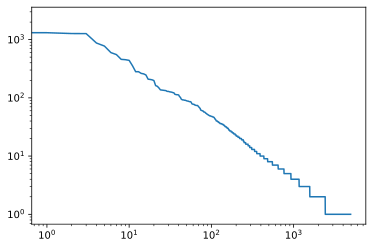

In [6]:
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

wordcounts = [count for _,count in counter.most_common()]
plt.loglog(wordcounts);

### Zipf's Law

$$n(x) \propto (x + c)^{-\alpha} \text{ and hence }
\log n(x) = -\alpha \log (x+c) + \mathrm{const.}$$

Does it work for word pairs, too?

In [7]:
wseq = [tk for st in raw_dataset for tk in st]
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('Beginning of the book\n', word_pairs[:10])
counter_pairs = collections.Counter(word_pairs)
print('Most common word pairs\n', counter_pairs.most_common(10))

Beginning of the book
 [('project', 'gutenberg'), ('gutenberg', 's'), ('s', 'the'), ('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'herbert'), ('herbert', 'george')]
Most common word pairs
 [(('of', 'the'), 335), (('in', 'the'), 184), (('i', 'had'), 130), (('and', 'the'), 112), (('i', 'was'), 112), (('the', 'time'), 106), (('to', 'the'), 101), (('it', 'was'), 99), (('project', 'gutenberg'), 86), (('as', 'i'), 78)]


### Frequency Statistics

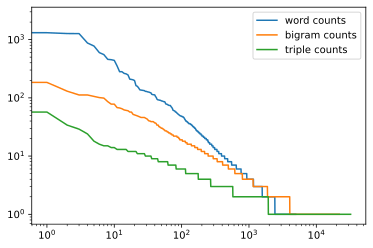

In [8]:
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
counter_triples = collections.Counter(word_triples)

bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();